<a href="https://colab.research.google.com/github/yulishadian/Image-Classification_270-268/blob/main/Image_Classification_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Tugas Besar ML/Kaggle/kaggle.json"

In [5]:
%cd "/content/gdrive/MyDrive/Tugas Besar ML/Kaggle"

/content/gdrive/MyDrive/Tugas Besar ML/Kaggle


In [6]:
!kaggle datasets download -d alxmamaev/flowers-recognition

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /content/gdrive/MyDrive/Tugas Besar ML/Kaggle/kaggle.json. Or use the environment method.


# Preprocessing

In [7]:
!unzip "/content/gdrive/MyDrive/Tugas Besar ML/Kaggle/flowers-recognition.zip" -d "/content/gdrive/MyDrive/Tugas Besar ML/Kaggle"

Archive:  /content/gdrive/MyDrive/Tugas Besar ML/Kaggle/flowers-recognition.zip
A
replace /content/gdrive/MyDrive/Tugas Besar ML/Kaggle/flowers/daisy/100080576_f52e8ee070_n.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: /content/gdrive/MyDrive/Tugas Besar ML/Kaggle/flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: /content/gdrive/MyDrive/Tugas Besar ML/Kaggle/flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: /content/gdrive/MyDrive/Tugas Besar ML/Kaggle/flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: /content/gdrive/MyDrive/Tugas Besar ML/Kaggle/flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: /content/gdrive/MyDrive/Tugas Besar ML/Kaggle/flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: /content/gdrive/MyDrive/Tugas Besar ML/Kaggle/flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: /content/gdrive/MyDrive/Tugas Besar ML/Kaggle/flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: /content/gdrive/MyDrive/Tugas Besar ML/Kaggle/flowers

In [8]:
!ls

flowers  flowers-recognition.zip  kaggle.json


In [9]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import os
from keras import layers,models

In [10]:
mypath= 'flowers/'

In [11]:
file_name = []
tag = []
full_path = []
for path, subdirs, files in os.walk(mypath):
    for name in files:
        full_path.append(os.path.join(path, name)) 
        tag.append(path.split('/')[-1])        
        file_name.append(name)

In [12]:
import pandas as pd

# memasukan variabel yang sudah dikumpulkan pada looping di atas menjadi sebuah dataframe agar rapih
df = pd.DataFrame({"path":full_path,'file_name':file_name,"tag":tag})
df.groupby(['tag']).size()

tag
daisy         764
dandelion    1052
rose          784
sunflower     733
tulip         984
dtype: int64

In [13]:
#cek sample datanya
df.head()

,path,file_name,tag
0,flowers/daisy/100080576_f52e8ee070_n.jpg,100080576_f52e8ee070_n.jpg,daisy
1,flowers/daisy/10172379554_b296050f82_n.jpg,10172379554_b296050f82_n.jpg,daisy
2,flowers/daisy/10140303196_b88d3d6cec.jpg,10140303196_b88d3d6cec.jpg,daisy
3,flowers/daisy/14600779226_7bbc288d40_m.jpg,14600779226_7bbc288d40_m.jpg,daisy
4,flowers/daisy/1342002397_9503c97b49.jpg,1342002397_9503c97b49.jpg,daisy


In [14]:
#load library untuk train test split
from sklearn.model_selection import train_test_split

In [15]:
#variabel yang digunakan pada pemisahan data ini
X= df['path']
y= df['tag']

In [16]:
# split dataset awal menjadi data train dan test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=300)

In [17]:
# Normalisasi dataset
#print("Data sebelum di-normalisasi ", train_data[0][0][0])

#x_train = train_data.astype('float32') / 255.0
#x_test = test_data.astype('float32') / 255.0
#print("Data setelah di-normalisasi ", x_train[0][0][0])

In [18]:
# kemudian data test dibagi menjadi 2 sehingga menjadi data test dan data validation.
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=0.5, random_state=100)

In [19]:
# menyatukan kedalam masing-masing dataframe

df_tr = pd.DataFrame({'path':X_train
              ,'tag':y_train
             ,'set':'train'})

df_te = pd.DataFrame({'path':X_test
              ,'tag':y_test
             ,'set':'test'})

df_val = pd.DataFrame({'path':X_val
              ,'tag':y_val
             ,'set':'validation'})

In [20]:
print('train size', len(df_tr))
print('val size', len(df_te))
print('test size', len(df_val))

train size 3453
val size 432
test size 432


In [21]:
# melihat proporsi pada masing masing set apakah sudah ok atau masih ada yang ingin diubah
df_all = df_tr.append([df_te,df_val]).reset_index(drop=1)\

print('===================================================== \n')
print(df_all.groupby(['set','tag']).size(),'\n')

print('===================================================== \n')

#cek sample datanya
df_all.sample(3)


set         tag      
test        daisy         79
            dandelion    112
            rose          86
            sunflower     67
            tulip         88
train       daisy        608
            dandelion    834
            rose         614
            sunflower    602
            tulip        795
validation  daisy         77
            dandelion    106
            rose          84
            sunflower     64
            tulip        101
dtype: int64 




,path,tag,set
2113,flowers/sunflower/6080086410_17a02dcfb8.jpg,sunflower,train
1640,flowers/rose/218630974_5646dafc63_m.jpg,rose,train
897,flowers/dandelion/8935477500_89f22cca03_n.jpg,dandelion,train


In [22]:
train_path = os.path.join("/content/gdrive/MyDrive/Tugas Besar ML/flowers")
classes = os.listdir(train_path)

In [23]:
train_gen = ImageDataGenerator(
    rescale = 1./255.,
    horizontal_flip = True,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2
)

train_data = train_gen.flow_from_directory(
    train_path, 
    target_size=(150, 150),
    batch_size = 64, 
    class_mode = "categorical" ,
    classes  = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip'],
    shuffle = True,
)

Found 4317 images belonging to 5 classes.


(64, 150, 150, 3)


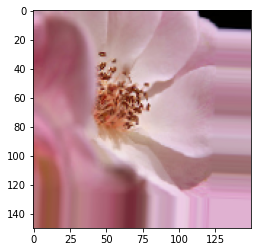

In [24]:
x, y = next(train_data)
print(x.shape)
plt.imshow(x[0])

In [25]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [ ]:
model.compile(loss = "categorical_crossentropy", metrics = "acc", optimizer='adam')
history = model.fit(train_data, epochs = 100 )

Epoch 1/100
68/68 [==============================] - 2136s 31s/step - loss: 1.3897 - acc: 0.4195
Epoch 2/100
68/68 [==============================] - 41s 599ms/step - loss: 1.0283 - acc: 0.5944
Epoch 3/100
68/68 [==============================] - 41s 595ms/step - loss: 0.9501 - acc: 0.6322
Epoch 4/100
68/68 [==============================] - 41s 598ms/step - loss: 0.8860 - acc: 0.6546
Epoch 5/100
68/68 [==============================] - 40s 592ms/step - loss: 0.8236 - acc: 0.6866
Epoch 6/100
68/68 [==============================] - 40s 593ms/step - loss: 0.7933 - acc: 0.6915
Epoch 7/100
68/68 [==============================] - 40s 593ms/step - loss: 0.7686 - acc: 0.7049
Epoch 8/100
68/68 [==============================] - 40s 589ms/step - loss: 0.7379 - acc: 0.7199
Epoch 9/100
68/68 [==============================] - 40s 598ms/step - loss: 0.6999 - acc: 0.7318
Epoch 10/100
68/68 [==============================] - 40s 590ms/step - loss: 0.6898 - acc: 0.7401
Epoch 11/100
68/68 [=========

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
from keras.models import model_from_json
import json

plt.figure(figsize = (20,8))
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
plt.subplot(1, 2, 1) 
plt.plot(history['acc'], label="train_acc_1")
plt.plot(history['val_acc'], label="val_acc_1")
plt.title('Model Accuracy', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('epoch', fontsize=15)
plt.legend(loc='upper left', fontsize=15)
#plt.show()

#plt.figure(figsize = (10,8))
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
plt.subplot(1, 2, 2) 
plt.plot(history['loss'], label="train_loss_1")
plt.plot(history['val_loss'], label="val_loss_1)")
plt.title('Model Loss', fontsize=15)
plt.ylabel('loss', fontsize=15)
plt.xlabel('epoch', fontsize=15)
plt.legend(loc='upper left', fontsize=15)
plt.show()

In [ ]:
#model = models.Sequential()
#model.add(layers.Conv2D(32, (3, 3), activation='relu',
#                        input_shape=(150, 150, 3)))
#model.add(layers.AveragePooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.AveragePooling2D((2, 2)))
#model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#model.add(layers.AveragePooling2D((2, 2)))
#model.add(layers.Flatten())
#model.add(layers.Dense(512, activation='relu'))
#model.add(layers.Dense(5, activation='softmax'))

In [ ]:
#model.compile(loss = "categorical_crossentropy", metrics = "acc", optimizer='adam')
#history_2 = model.fit(train_data, epochs = 10 )

In [ ]:
#from keras.models import model_from_json
#target_dir = "/content/gdrive/MyDrive/Tugas Besar ML/Model1"

# simpan history model pertama
#history_dict = history_.history
#json.dump(history_dict, open(target_dir + '/history_pertama.json', 'w'))

# simpan model pertama dan weight-nya
#model.save(target_dir + '/model_pertama.h5')
#model.save_weights(target_dir + '/model_pertama_weights.h5')

In [ ]:
#from keras.models import model_from_json
#target_dir = "/content/gdrive/MyDrive/Tugas Besar ML/Model2"

# simpan history model pertama
#history_dict = history_2.history
#json.dump(history_dict, open(target_dir + '/history_kedua.json', 'w'))

# simpan model pertama dan weight-nya
#model.save(target_dir + '/model_kedua.h5')
#model.save_weights(target_dir + '/model_kedua_weights.h5')